In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/juhimishra/Downloads/dataset1-master 2/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


All the columns are continous data except sex column which is in string/object form. And by seeing the above data can conclude that this data is regression problem.

## EDA

In [3]:
data.shape

(4177, 9)

Total 4177 rows and 9 columns

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
data.nunique().to_frame('of unique values')

,of unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
Rings,28


In [6]:
# Describing summary of all the features
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
# checking throug isna method is there any missing data as describe doesn't show object column
data.isna().sum().to_frame(name = 'Missing Values')

,Missing Values
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


There are no missing value 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
le = LabelEncoder()

In [10]:
df = le.fit_transform(data['Sex'])
pd.Series(df)

0       2
1       2
2       0
3       2
4       1
5       1
6       0
7       0
8       2
9       0
10      0
11      2
12      2
13      0
14      0
15      2
16      1
17      0
18      2
19      2
20      2
21      1
22      0
23      0
24      0
25      0
26      0
27      2
28      2
29      2
30      2
31      0
32      2
33      0
34      0
35      2
36      0
37      0
38      0
39      2
40      0
41      0
42      1
43      1
44      1
45      1
46      2
47      0
48      1
49      0
50      1
51      2
52      2
53      0
54      2
55      0
56      2
57      2
58      1
59      0
60      2
61      2
62      0
63      2
64      2
65      2
66      0
67      0
68      0
69      1
70      2
71      0
72      0
73      2
74      0
75      0
76      2
77      0
78      0
79      0
80      0
81      2
82      0
83      2
84      2
85      0
86      2
87      2
88      0
89      0
90      2
91      2
92      2
93      0
94      2
95      2
96      2
97      2
98      2
99      0


In [11]:
data['Sex'] = df

In [12]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


As all the columns are in float so changing target variable also into float and adding 1.5 to rings and renaming the same to age 

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [13]:
data['age']=data.Rings+1.5
data.drop('Rings',axis = 1,inplace = True) # Removing ring column as the same has been converted to age column 

In [14]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


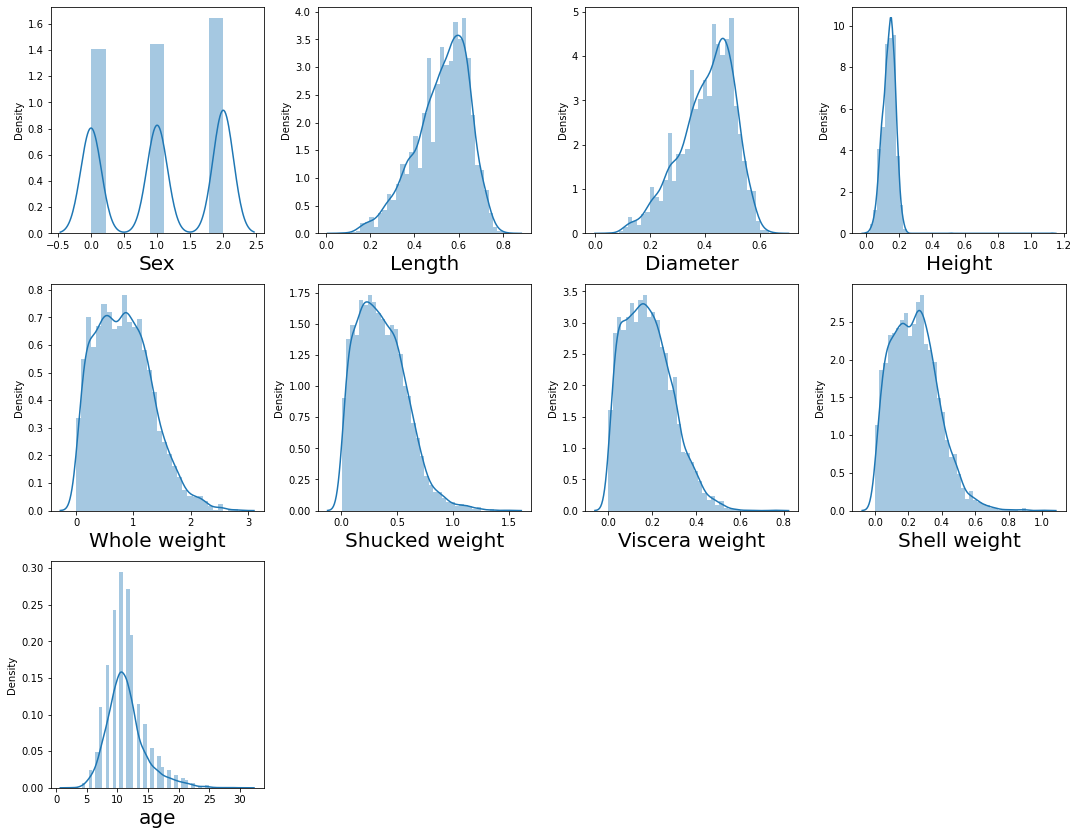

In [31]:
# Checking skewness in data
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [32]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

Here we checked the skewness present in data with the help of scatter plot. And according to graph come to conclusion
that below mentioned features are skewed data as those data doesn't lies between -5 to +5
1. Length
2. Diameter
3. Height
4. Whole weight
5. Shucked weight
6. Viscera weight
7. Shell weight

In [15]:
# Removing Skewness Using Power Transformer
from sklearn.preprocessing import PowerTransformer

In [16]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [17]:
features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']

In [18]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [19]:
data[features] = scaler.fit_transform(data[features].values)

In [20]:
data[features].head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528


In [41]:
data.skew()

Sex              -0.098155
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
age               1.114102
dtype: float64

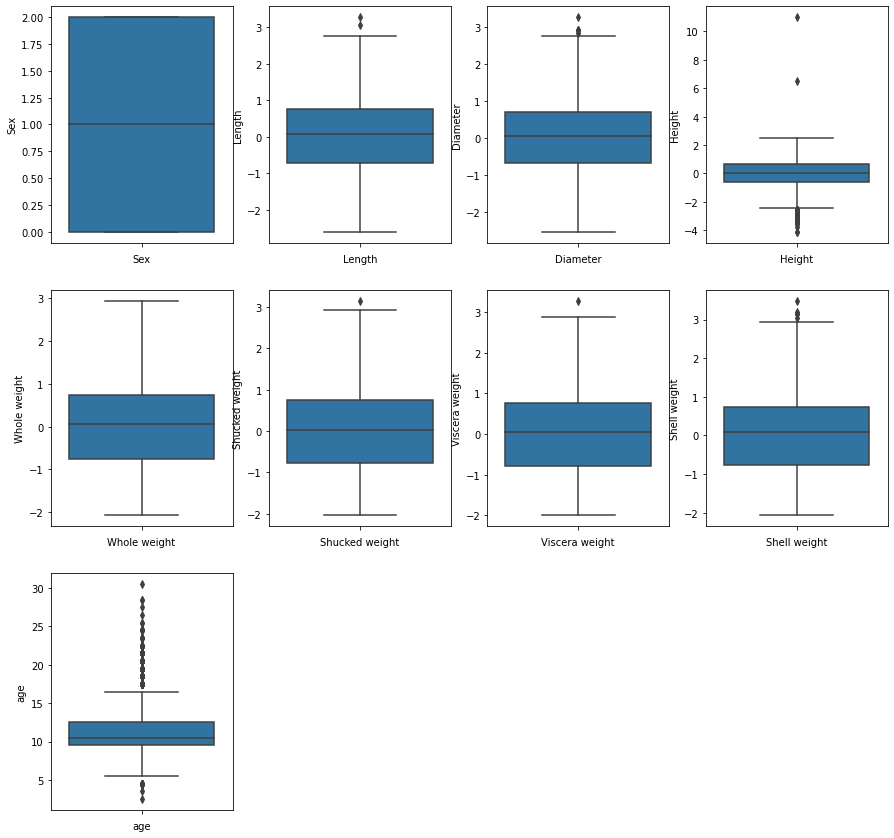

In [43]:
# Checking Outliers in data
plt.figure(figsize=(15,20))

graph=1

for column in data.columns:
    if graph<=12:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(y=data[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

Removing outliers with the help of z score

In [21]:
from scipy.stats import zscore

In [22]:
z = np.abs(zscore(data))
threshold = 3
np.where(z>3)

(array([   6,   72,   83,  163,  166,  166,  167,  181,  232,  236,  237,
         238,  270,  275,  278,  294,  306,  310,  313,  314,  351,  355,
         362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
         530,  572,  628,  673,  674,  675,  678,  694,  719,  720,  744,
         754,  756,  811,  891, 1174, 1209, 1257, 1417, 1428, 1428, 1763,
        1987, 2051, 2108, 2108, 2161, 2169, 2171, 2172, 2176, 2180, 2199,
        2201, 2209, 2275, 2305, 2334, 2334, 2335, 2344, 2358, 2381, 2436,
        2459, 2471, 2711, 3140, 3149, 3151, 3190, 3193, 3280, 3359, 3902,
        3924, 3930, 3944, 3996]),
 array([8, 8, 8, 7, 7, 8, 8, 8, 8, 3, 3, 3, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 8,
        8, 8, 8, 7, 3, 5, 3, 3, 1, 2, 6, 3, 3, 7, 8, 7, 3, 3, 3, 8, 8, 8,
        8, 8, 8, 8, 1, 8, 8, 8, 8, 3, 8, 8, 8, 3, 8, 8, 8, 3, 8, 8, 8, 3,
        8, 8, 8, 3]))

In [23]:
data_new_z = data[(z<3).all(axis=1)]
data_new_z.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,16.5
1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,8.5
2,0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,10.5
3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,11.5
4,1,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,8.5


In [24]:
data_new_z.shape

(4089, 9)

In [25]:
# Percentage loss of data
Data_loss = ((4177-4089)/4177)*100
Data_loss

2.1067751975101747

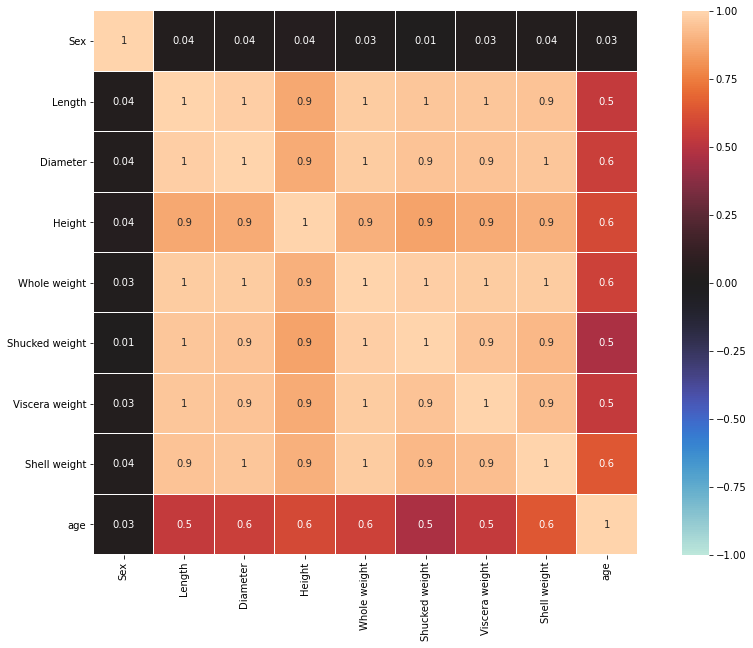

In [50]:
# Checking correlation with the help of heatmap
df_corr = data.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


In [26]:
# Splitting Target and feature variable into x and y
x = data.drop(columns = ['age'])
y = data['age']

In [27]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.15198011, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 1.15198011, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-1.28068972, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 1.15198011,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [-1.28068972,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.15198011,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

# Finding best random state

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [31]:
maxr2_score = 0
maxrs = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    r2_score = r2_score(y_test,pred)
    if r2_score>maxr2_score:
        maxr2_score=r2_score
        maxrs=i
print("Best r2 score is:",maxr2_score,"On Random state: ",maxrs)

TypeError: 'numpy.float64' object is not callable